In [33]:
## Loading of Python libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import seaborn as sns
%matplotlib inline 

In [34]:
#Loading the dataset for House price
df=pd.read_csv("House_Price_Prediction.csv")

In [36]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,0,42000,8.674197,3.0,1,2,1,1,0,1,0,0,0
1,1,38500,8.294050,2.0,1,1,0,1,0,0,0,0,0
2,2,49500,8.026170,3.0,1,1,0,1,0,0,0,0,0
3,3,60500,8.802372,3.0,1,2,0,1,1,0,0,0,0
4,4,61000,8.757784,3.0,1,1,0,1,0,0,0,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    551 non-null    int64  
 1   price         551 non-null    int64  
 2   lotsize       551 non-null    float64
 3   bedrooms      551 non-null    float64
 4   bathrms       551 non-null    int64  
 5   stories       551 non-null    int64  
 6   garagepl      551 non-null    int64  
 7   driveway_yes  551 non-null    int64  
 8   recroom_yes   551 non-null    int64  
 9   fullbase_yes  551 non-null    int64  
 10  gashw_yes     551 non-null    int64  
 11  airco_yes     551 non-null    int64  
 12  prefarea_yes  551 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 56.1 KB


In [38]:
df.describe()


,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,275.000000,68445.811252,8.470413,2.967332,1.286751,1.820327,0.698730,0.860254,0.177858,0.346642,0.045372,0.321234,0.232305
std,159.204271,26848.486040,0.399086,0.732880,0.502165,0.881334,0.863386,0.347038,0.382741,0.476333,0.208308,0.467375,0.422686
min,0.000000,25000.000000,7.408531,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137.500000,49500.000000,8.188689,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,275.000000,62500.000000,8.433812,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,412.500000,82950.000000,8.757784,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,550.000000,190000.000000,9.692767,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
df.isnull().sum()

Unnamed: 0      0
price           0
lotsize         0
bedrooms        0
bathrms         0
stories         0
garagepl        0
driveway_yes    0
recroom_yes     0
fullbase_yes    0
gashw_yes       0
airco_yes       0
prefarea_yes    0
dtype: int64

In [40]:
df.shape

(551, 13)

<Axes: >

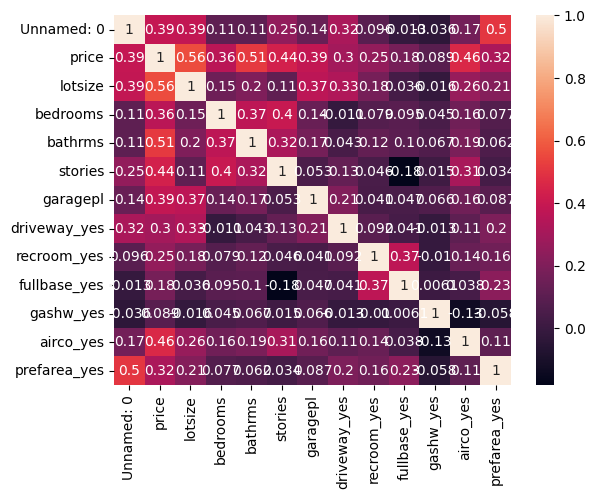

In [41]:
sns.heatmap(df.corr(),annot=True)

In [45]:
#droping Unnamed Column
#df=df.loc[:,~df.columns.str.contains('^Unnamed')]
df1=df.drop('Unnamed: 0',axis=1)

In [46]:
df1

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000,8.674197,3.0,1,2,1,1,0,1,0,0,0
1,38500,8.294050,2.0,1,1,0,1,0,0,0,0,0
2,49500,8.026170,3.0,1,1,0,1,0,0,0,0,0
3,60500,8.802372,3.0,1,2,0,1,1,0,0,0,0
4,61000,8.757784,3.0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
546,107500,8.699515,3.0,2,4,1,1,0,0,0,1,0
547,108000,8.699515,3.0,2,3,0,1,0,0,0,1,0
548,113750,8.699515,3.0,1,4,2,1,1,0,0,1,0
549,120000,8.853665,3.0,1,4,2,1,0,0,0,1,0


In [48]:
df1.shape

(551, 12)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         551 non-null    int64  
 1   lotsize       551 non-null    float64
 2   bedrooms      551 non-null    float64
 3   bathrms       551 non-null    int64  
 4   stories       551 non-null    int64  
 5   garagepl      551 non-null    int64  
 6   driveway_yes  551 non-null    int64  
 7   recroom_yes   551 non-null    int64  
 8   fullbase_yes  551 non-null    int64  
 9   gashw_yes     551 non-null    int64  
 10  airco_yes     551 non-null    int64  
 11  prefarea_yes  551 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 51.8 KB


<Axes: >

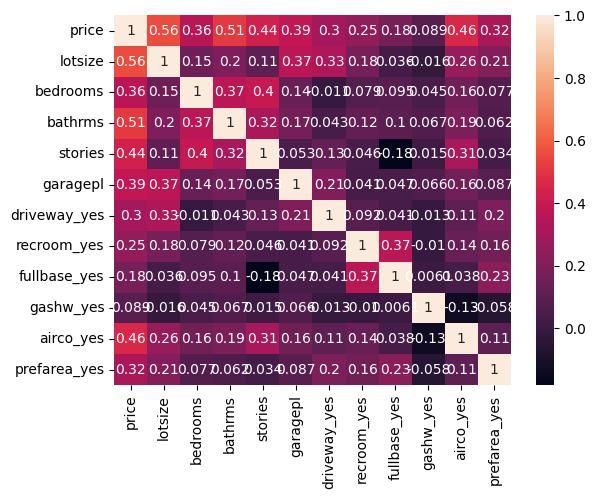

In [50]:
sns.heatmap(df1.corr(),annot=True)

In [51]:
# Features and target
# this will maintain columns of interest with the significant correlation coefficient. OTHERWISE to maintain all the features except for the price make use of the following 
#X=df.drop('price',axis=1)

#X=df[['lotsize','bedrooms','bathrms','stories','garagepl','driveway_yes', 'recroom_yes','airco_yes','prefarea_yes']]
#alternatively we can drop the price column and remain with the rest of the features
X=df1.drop('price', axis=1)
y=df1['price']

Train-Test SPlit 

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42) 

In [59]:
# Fit the multiple linear regression model 
model=LinearRegression()
model.fit(X_train,y_train)
LinearRegression()

LinearRegression()

In [62]:
intercept=model.intercept_
intercept

-146830.4530080135

In [63]:
coef=model.coef_
coef

array([19056.8714323 ,  1617.12766738, 13851.41411857,  6944.38631783,
        5162.1533645 ,  6070.09346706,  5116.91276645,  6422.60269769,
       14810.95910614, 12659.96258895,  9113.65267641])

In [64]:
#Predictions 
y_pred=model.predict(X_test)

# Evaluation of the Model 

In [65]:
#Evaluate the model
#Calcute MAE
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error is,{mae}")


Mean Absolute Error,10714.764314067517


In [66]:
# Calculate Mean Square Error - MSE
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Square Error is,{mse}")

Mean Square Error,194298447.52374828
